In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [119]:
df=pd.read_csv('abalone.csv')

In [120]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [121]:
print(df.shape)

(4177, 9)


In [122]:
print(df.head())

  Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')


In [124]:
#Getting the summary of dataframe
print(df.describe())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [125]:
#Checking for missing values

df.select_dtypes(include=['object']).isnull().sum()
df.select_dtypes(include=[np.number]).isnull().sum()

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [126]:
#Adding age column in the dataframe for classification. Age is classified based on the number of rings.
#Rings 1-8 -->Age 1, denoting young
#Rings 9-10 -->Age 2, denoting middle
#Rings 11-29 -->Age 3, denoting old

In [127]:
def label_race (row):
   if row['Rings']>=1 and row['Rings']<=8:
      return 1
   elif row['Rings'] >=9 and row['Rings']<=10:
      return 2
   elif row['Rings']>=11 and row['Rings']<=29:
      return 3
   return 0

In [128]:
df['Age'] = df.apply(lambda _: '', axis=1)

In [129]:
df['Age']=df.apply (lambda row: label_race (row),axis=1)

In [130]:
df['Sex']=df.apply(lambda _: '', axis=1)

In [131]:
df['Sex']=df.apply (lambda row: label_race (row),axis=1)

In [132]:
df.Sex = df.Sex.astype(float)

In [133]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,3.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [134]:
df[df['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
1257,1.0,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1
3996,1.0,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1


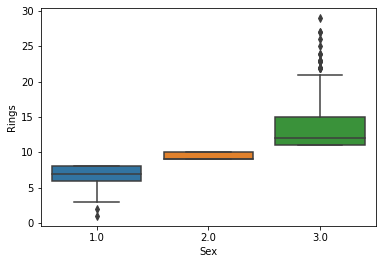

In [135]:
sns.boxplot(x="Sex", y="Rings", data=df)


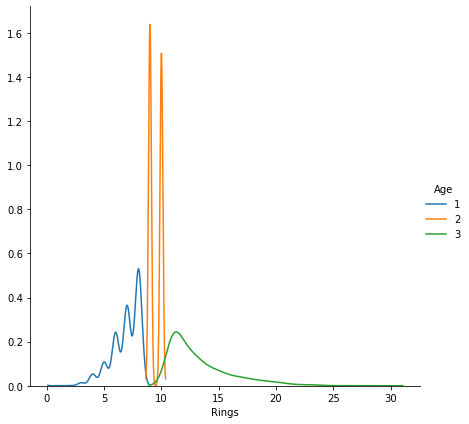

In [136]:

#Infants have lower number of rings as compared to males and females
sns.FacetGrid(df, hue="Age", size=6).map(sns.kdeplot, "Rings").add_legend()

In [137]:
#Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings,
#Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

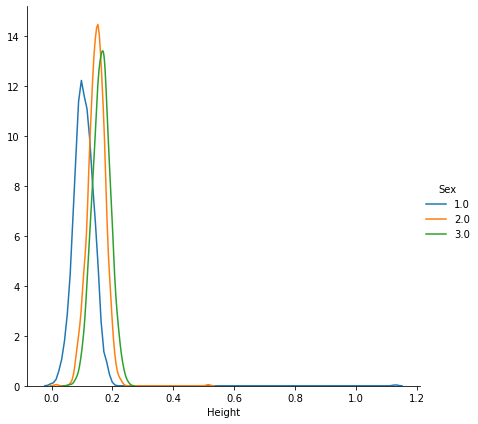

In [138]:
sns.FacetGrid(df, hue="Sex", size=6) .map(sns.kdeplot, "Height") .add_legend()

In [139]:
#Female abalones have more height than males and infants. 

In [140]:
Y = df[['Age']]
Y

,Age
0,3
1,1
2,2
3,2
4,1
...,...
4172,3
4173,2
4174,2
4175,2


In [141]:
#Predictor variables obtained by dropping rings and age from the dataframe

In [142]:
X=df.drop(['Age','Rings'], axis=1)
X

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,3.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


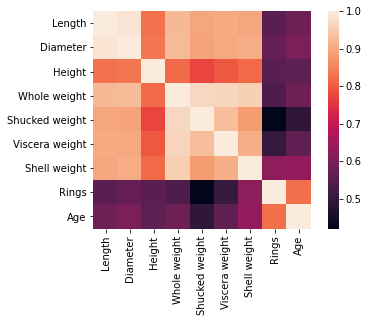

In [143]:
#Correlation matrix
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()

sns.heatmap(corr, vmax=1, square=True)

In [144]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,3.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [145]:
#training and splitting data

In [146]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y) 

In [147]:
#print("train_df_x:")
print(train_X.shape)

print("train_df_y:")
print(train_y.shape)

print("test_df_x:")
print(test_X.shape)

print("test_df_y:")
print(test_y.shape)

(3132, 8)
train_df_y:
(3132, 1)
test_df_x:
(1045, 8)
test_df_y:
(1045, 1)


In [148]:
def getAccuracy(testSet, predictions):

    correct = 0

    for x in range(len(testSet)):

        if testSet[x][-1] == predictions[x]:

            correct += 1

    return (correct/float(len(testSet))) * 100.0

In [149]:
#Function to calculate ROC curve

import statsmodels.api as sm
from sklearn.metrics import accuracy_score


In [150]:
#logistic regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
log_reg.fit(train_X, train_y)
print ("Intercept is ",log_reg.intercept_)
print("Coefficient is ",log_reg.coef_)
y_pred=log_reg.predict(test_X) 

Intercept is  [ 17.74383611   2.93652822 -20.68036433]
Coefficient is  [[-9.08603874 -0.28673397 -0.2534002  -0.10025051 -0.79652196 -0.23220097
  -0.20226848 -0.32184737]
 [-0.12829802  0.21687451  0.16535771  0.03037177  0.16732733  0.3045873
   0.11068672 -0.04447672]
 [ 9.21433675  0.06985946  0.08804249  0.06987874  0.62919463 -0.07238633
   0.09158177  0.36632409]]


In [151]:
#calculate Confusion Matrix

from sklearn import metrics
import math as m 
from sklearn.metrics import mean_squared_error,median_absolute_error
print("Confusion Matrix")
metrics.confusion_matrix(test_y, y_pred)
    
print("Accuracy of Logistic Regression is:")
print(accuracy_score(test_y, y_pred)*100)


#Mean Absolute Error 
mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))

#RMSE 
rmse = m.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))

#Median Absolute error
Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae)) 


print("Classification report for Test data %s:\n%s\n\n"
     % (log_reg, metrics.classification_report(test_y, y_pred)))

Confusion Matrix
Accuracy of Logistic Regression is:
100.0
MAE:0.0
RMSE:0.0
Median Absolute Error:0.0
Classification report for Test data LogisticRegression(multi_class='multinomial', solver='newton-cg'):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       367

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045





In [152]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest
rf = RandomForestClassifier(n_jobs=2)
rf.fit(train_X, train_y)
preds = rf.predict_proba(test_X)[:,1]
y_pred=rf.predict(test_X)
#calculate ROC curve
#calculate_roc_curve(y_test, y_pred,2) 


#calculate Confusion Matrix
print("Confusion Matrix")
metrics.confusion_matrix(test_y, y_pred)

print("Accuracy of Random Forest is:")
print(accuracy_score(test_y, y_pred)*100)

#Mean Absolute Error 

mae=mean_absolute_error(test_y,y_pred);
print("MAE:"+str(mae))
#RMSE 
rmse = m.sqrt(mean_squared_error(test_y,y_pred))
print("RMSE:"+str(rmse))
#Median Absolute error
Medae=median_absolute_error(test_y,y_pred)
print("Median Absolute Error:"+str(Medae)) 


print("Classification report for Test data %s:\n%s\n\n"
     % (rf, metrics.classification_report(test_y, y_pred)))

Confusion Matrix
Accuracy of Random Forest is:
100.0
MAE:0.0
RMSE:0.0
Median Absolute Error:0.0
Classification report for Test data RandomForestClassifier(n_jobs=2):
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       346
           2       1.00      1.00      1.00       332
           3       1.00      1.00      1.00       367

    accuracy                           1.00      1045
   macro avg       1.00      1.00      1.00      1045
weighted avg       1.00      1.00      1.00      1045





In [153]:
from scipy.stats import skew

In [154]:
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import  RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.linear_model import  Ridge
from sklearn.svm import SVR

In [155]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [156]:
#From problem statement and feature discription, let's first compute the target varible of the problem ' Age' and assign it to the dataset. Age = 1.5+Rings

In [157]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,3
1,1.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,2.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,2.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,2
4,1.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,1
...,...,...,...,...,...,...,...,...,...,...
4172,3.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,3
4173,2.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,2
4174,2.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,2
4175,2.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [95]:
print('This dataset has {} observations with {} features.'.format(df.shape[0], df.shape[1]))

This dataset has 4177 observations with 10 features.


In [96]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age', 'age'],
      dtype='object')

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   float64
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Age             4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 326.5 KB


In [102]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [103]:
numerical_features

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age', 'age'],
      dtype='object')

In [104]:
categorical_features

Index([], dtype='object')

In [105]:
skew_values = skew(df[numerical_features], nan_policy = 'omit')


In [106]:
dummy = pd.concat([pd.DataFrame(list(numerical_features), columns=['Features']), 
           pd.DataFrame(list(skew_values), columns=['Skewness degree'])], axis = 1)


In [107]:
dummy.sort_values(by = 'Skewness degree' , ascending = False)

,Features,Skewness degree
3,Height,3.127694
9,age,1.113702
5,Shucked weight,0.718840
7,Shell weight,0.620704
6,Viscera weight,0.591640
4,Whole weight,0.530768
0,Sex,-0.017800
8,Age,-0.017800
2,Diameter,-0.608979
1,Length,-0.639643


In [108]:
#   - Height has highest skewedness followed by age, Shucked weight (can be cross verified through histogram plot)

In [110]:
# Missing values
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(df))*100
pd.concat([missing_values, percentage_missing_values], axis = 1, keys= ['Missing values', '% Missing'])

,Missing values,% Missing
age,0,0.0
Age,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


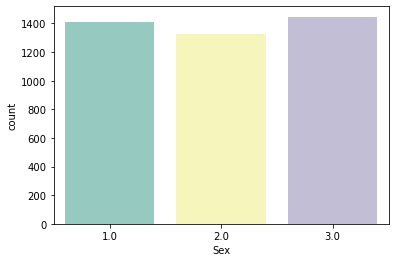

In [114]:
sns.countplot(x = 'Sex', data = df, palette="Set3")

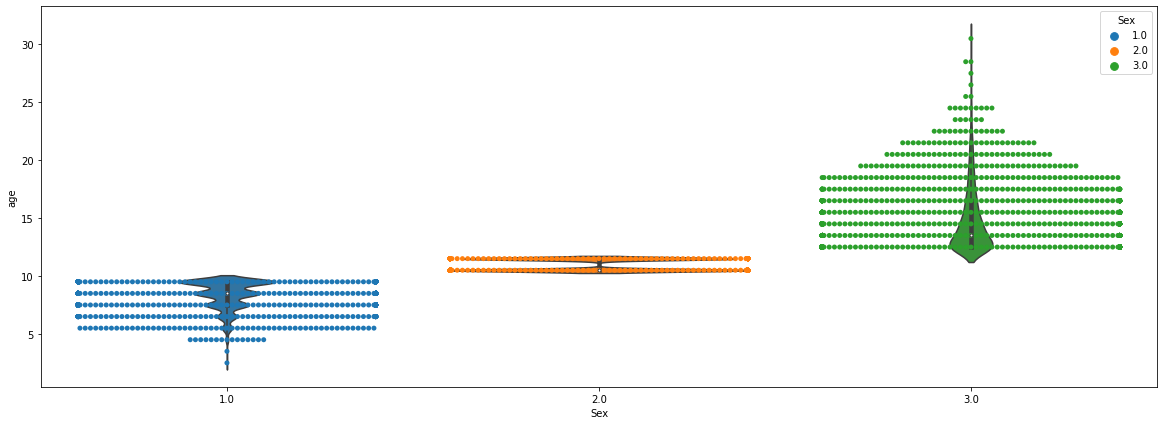

In [113]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'age', data = df)

In [115]:
# Male : age majority lies in between 7.5 years to 19 years
   # Female: age majority lies in between 8 years to 19 years
   # Immature: age majority lies in between 6 years to < 10 years

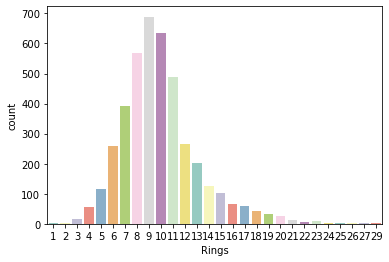

In [158]:
sns.countplot(x = 'Rings', data = df, palette="Set3")

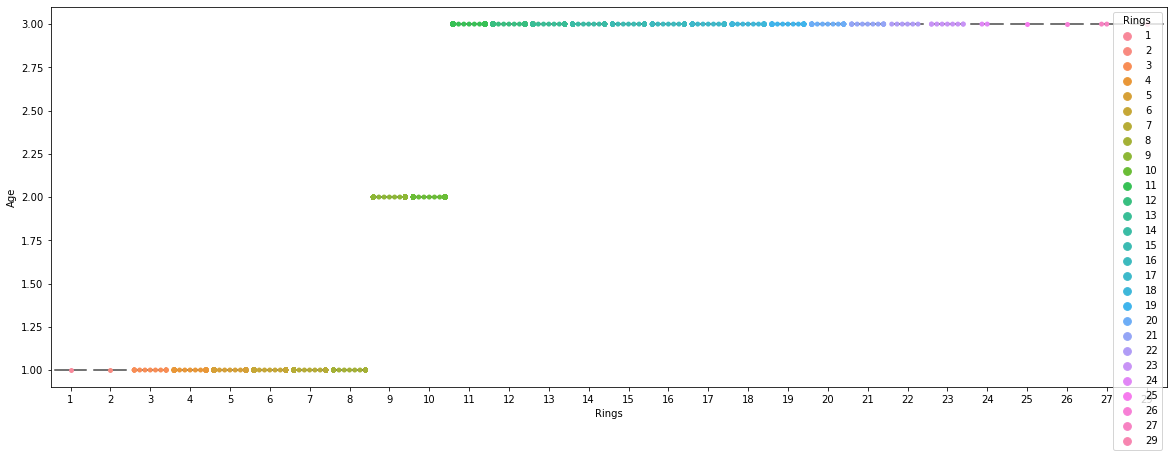

In [161]:

plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Rings', y = 'Age', data = df, hue = 'Rings')
sns.violinplot(x = 'Rings', y = 'Age', data = df)

In [162]:
df['Age']

0       3
1       1
2       2
3       2
4       1
       ..
4172    3
4173    2
4174    2
4175    2
4176    3
Name: Age, Length: 4177, dtype: int64

In [ ]:
#Conclusion :
    #Age labelled 1 are youth, label 2 are middle aged and 3 are old aged. Young abalones have 0-10 rings,
#Middle aged abalones have 9-11 rings and old abalones have more than 10 rings

#Basically  with number of ring increases age